# Описание задачи

Многие знают про маркетплейсы где продаются б/у вещи, на которых есть возможность недорого купить качественную и полезную вещь. Но всегда волнует вопрос - кто и как устанавливает цену, и какие его характеристики больше всего влияют на итоговую стоимость продажи?! Вопрос становиться особо актуальным, если речь идет про дорогие товары, например про автомобили!
Предлагаем вам принять участие в Мастерской, в рамках которой вы сможете поработать с данными о продажах автомобилей на вторичном рынке. Целью вашего проекта будет разработанная модель предсказания стоимости автомобиля на вторичном рынке.

## Основные этапы полноценного исследования:
- загрузка и ознакомление с данными,
- предварительная обработка,
- полноценный разведочный анализ,
- разработка новых синтетических признаков,
- проверка на мультиколлинеарность,
- отбор финального набора обучающих признаков,
- выбор и обучение моделей,
- итоговая оценка качества предсказания лучшей модели.

Дополнительное задание
Для тех, кому этого покажется мало у нас есть дополнительное задание:
- создать web-приложения прототип вашей модели, используя библиотеку Streamlit.
- Подготовка отчета по исследованию. Если останется время можно подготовить полноценный отчет по исследовательской работе Дата Сайнтиста. Примеры хороших отчетов можно посмотреть на сайте Stanford University - отчеты по финальным проектам направления Machine Learning - https://cs229.stanford.edu/projects2014.html. Из примеров понятно наполнение отчета по исследованию, а так же, что главное - понятна сама структура отчета. В реальной работе именно такой формат отчета обычно завершает исследование.

Мастерская будет проходить в виде соревнования на платформе Kaggle. Длительность — 2 недели. Для участников — это отличная возможность не только выполнить интересный проект, который можно будет добавить в свое портфолио, но и познакомиться с одной из самых популярных соревновательных Интернет-площадок, на которой можно исследовать и создавать модели, взаимодействовать с другими специалистами по данным, организовывать и участвовать в конкурсах, посвященных анализу данных и машинному обучению.

## Описание данных

`Date` - Год выпуска автомобиля. \
`Make` - Марка автомобиля. \
`Model` - издание автомобиля определенной марки. \
`Trim` - Уровни отделки салона автомобиля — это просто разные версии модели. \
`Body` - Тип кузова транспортного средства относится к форме и модели конкретной марки автомобиля. \
`Transmission` - механизм, который передает мощность от двигателя к колесам. \
`VIN` - идентификационный номер транспортного средства. \
`State` -  состояние, в котором автомобиль выставлен на аукцион. \
`Condition` - Состояние автомобилей на момент аукциона. \
`Odometer` - расстояние, пройденное автомобилем с момента выпуска. \
`Color` - Цвет кузова автомобиля. \
`Interior` - Цвет салона автомобиля. \
`Seller` - Продавец автомобиля, автосалоны. \
`mmr` - Рекорд рынка Manhiem, рыночная оценочная цена автомобилей. \
`sellingprice` - цена, по которой автомобиль был продан на аукционе. \
`saledate` - Дата продажи автомобиля. 

# Выполнение задания

Импорт библиотек

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder #энкодинг
from sklearn.preprocessing import StandardScaler #масштабирование
from sklearn.model_selection import train_test_split #деление данных
from sklearn.tree import DecisionTreeRegressor #Дерево решений
from sklearn.ensemble import RandomForestRegressor #Случайный лес
from sklearn.linear_model import LinearRegression #Линейная регрессия
from sklearn.linear_model import SGDRegressor #Линейная регрессия
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_percentage_error
from string import ascii_lowercase as alc

import warnings
warnings.filterwarnings('ignore') 

STATE = np.random.RandomState(12345)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Чтение данных и краткая информация о них

Обучающие данные

In [2]:
train_df = pd.read_csv('train.csv')
train_df_start_rows = train_df.shape[0]
display(train_df.head())
print(train_df.info())

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2011,Ford,Edge,SEL,suv,automatic,2fmdk3jc4bba41556,md,4.2,111041.0,black,black,santander consumer,12500,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Ford,Fusion,SE,Sedan,automatic,3fa6p0h75er208976,mo,3.5,31034.0,black,black,ars/avis budget group,14500,Wed Feb 25 2015 02:00:00 GMT-0800 (PST)
2,2012,Nissan,Sentra,2.0 SL,sedan,automatic,3n1ab6ap4cl698412,nj,2.2,35619.0,black,black,nissan-infiniti lt,9100,Wed Jun 10 2015 02:30:00 GMT-0700 (PDT)
3,2003,HUMMER,H2,Base,suv,automatic,5grgn23u93h101360,tx,2.8,131301.0,gold,beige,wichita falls ford lin inc,13300,Wed Jun 17 2015 03:00:00 GMT-0700 (PDT)
4,2007,Ford,Fusion,SEL,Sedan,automatic,3fahp08z17r268380,md,2.0,127709.0,black,black,purple heart,1300,Tue Feb 03 2015 04:00:00 GMT-0800 (PST)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440236 entries, 0 to 440235
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          440236 non-null  int64  
 1   make          432193 non-null  object 
 2   model         432113 non-null  object 
 3   trim          431899 non-null  object 
 4   body          429843 non-null  object 
 5   transmission  388775 non-null  object 
 6   vin           440236 non-null  object 
 7   state         440236 non-null  object 
 8   condition     430831 non-null  float64
 9   odometer      440167 non-null  float64
 10  color         439650 non-null  object 
 11  interior      439650 non-null  object 
 12  seller        440236 non-null  object 
 13  sellingprice  440236 non-null  int64  
 14  saledate      440236 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 50.4+ MB
None


Тестовые данные

In [3]:
test_df = pd.read_csv('test.csv')
display(test_df.head())
print(test_df.info())

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,saledate
0,2005,Cadillac,CTS,Base,Sedan,automatic,1g6dp567450124779,ca,2.7,116970.0,silver,black,lexus of stevens creek,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)
1,2014,GMC,Savana Cargo,2500,Van,NaN,1gtw7fca7e1902207,pa,4.4,6286.0,white,gray,u-haul,Fri Feb 27 2015 01:00:00 GMT-0800 (PST)
2,2013,Nissan,Murano,S,SUV,automatic,jn8az1mw6dw303497,oh,4.6,11831.0,gray,black,nissan-infiniti lt,Tue Feb 24 2015 01:30:00 GMT-0800 (PST)
3,2013,Chevrolet,Impala,LS Fleet,Sedan,automatic,2g1wf5e34d1160703,fl,2.3,57105.0,silver,black,onemain rem/auto club of miami inc dba north dad,Fri Mar 06 2015 02:00:00 GMT-0800 (PST)
4,2013,Nissan,Titan,SV,Crew Cab,automatic,1n6aa0ec3dn301209,tn,2.9,31083.0,black,black,nissan north america inc.,Wed Jun 03 2015 03:30:00 GMT-0700 (PDT)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110058 entries, 0 to 110057
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          110058 non-null  int64  
 1   make          107997 non-null  object 
 2   model         107979 non-null  object 
 3   trim          107944 non-null  object 
 4   body          107464 non-null  object 
 5   transmission  97047 non-null   object 
 6   vin           110058 non-null  object 
 7   state         110058 non-null  object 
 8   condition     107679 non-null  float64
 9   odometer      110039 non-null  float64
 10  color         109900 non-null  object 
 11  interior      109900 non-null  object 
 12  seller        110058 non-null  object 
 13  saledate      110058 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 11.8+ MB
None


Данные показали, что нужно преобразовать оба столбца `year`, `saledate` из int64, object в object, datetime, соответственно

## Предобработка данных

### Тренировочные данные

#### Преобразование столбцов

Преобразование столбца `saledate`

In [4]:
train_df['year'] = train_df['year'].astype('str')

Обработка столбца `saledate`

In [5]:
weeks_abv = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
mons_abv = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [6]:
def weekday(row):
    saledate = row['saledate']
    for weekday in weeks_abv:
        if weekday in saledate:
            return weekday

In [7]:
def timezone(row):
    saledate = row['saledate']
    dates = saledate.split(' G')
    return 'G' + dates[1] 

In [8]:
def saledate(row):
    saledate = row['saledate']
    for i in range(len(weeks_abv)):
        if weeks_abv[i] in saledate:
            saledate = saledate.replace(weeks_abv[i], f'')
            break
    for i in range(len(mons_abv)):
        if mons_abv[i] in saledate:
            saledate = saledate.replace(mons_abv[i], f'{i+1}')
            break
    dates = saledate.split(' G')
    return dates[0]

In [9]:
train_df['weekday'] = train_df.apply(weekday, axis=1)
train_df['timezone'] = train_df.apply(timezone, axis=1)
train_df['saledate'] = train_df.apply(saledate, axis=1)

In [10]:
train_df['saledate'] = pd.to_datetime(train_df['saledate'], format=' %m %d %Y %H:%M:%S')

In [11]:
display(train_df.head())

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate,weekday,timezone
0,2011,Ford,Edge,SEL,suv,automatic,2fmdk3jc4bba41556,md,4.2,111041.0,black,black,santander consumer,12500,2015-06-02 02:30:00,Tue,GMT-0700 (PDT)
1,2014,Ford,Fusion,SE,Sedan,automatic,3fa6p0h75er208976,mo,3.5,31034.0,black,black,ars/avis budget group,14500,2015-02-25 02:00:00,Wed,GMT-0800 (PST)
2,2012,Nissan,Sentra,2.0 SL,sedan,automatic,3n1ab6ap4cl698412,nj,2.2,35619.0,black,black,nissan-infiniti lt,9100,2015-06-10 02:30:00,Wed,GMT-0700 (PDT)
3,2003,HUMMER,H2,Base,suv,automatic,5grgn23u93h101360,tx,2.8,131301.0,gold,beige,wichita falls ford lin inc,13300,2015-06-17 03:00:00,Wed,GMT-0700 (PDT)
4,2007,Ford,Fusion,SEL,Sedan,automatic,3fahp08z17r268380,md,2.0,127709.0,black,black,purple heart,1300,2015-02-03 04:00:00,Tue,GMT-0800 (PST)


#### Обработка дубликатов

Проверка на явные дубликаты

In [12]:
train_df.duplicated().sum()

0

Явных дубликатов нет, теперь рассмотрим неявные

Для этого напишем функцию, которая заменит все значения столбцов с типом строки на нижний регистр. Это будет первый шаг для удаления неявных дубликатов 

In [13]:
def edit_row(row_column):
    row_column = row_column.lower()
    row_column = row_column.replace('—', '-')
    row_column = row_column.replace('!', '-')
    row_column = row_column.replace('+', '-')
    row_column = row_column.replace('&', ' & ')
    row_column = row_column.replace('  ', ' ')
    row_column = row_column.replace(',,', ',')
    row_column = row_column.replace('..', '.')
    row_column = row_column.lstrip()
    row_column = row_column.rstrip()
    for i in range(10):
        row_column = row_column.replace(f' -{i}', f' {i}')
    for i in alc: #del dubl letters
        row_column = row_column.replace(f'{i}{i}{i} ', f'{i} ')
        row_column = row_column.replace(f'{i}{i} ', f'{i} ')
    return row_column

In [14]:
%%time

for column in train_df.columns:
    if (train_df[column].dtype == np.object) & (column != 'vin'):
        train_df[column] = train_df[column].fillna('-')
        train_df[column] = train_df.apply(lambda x: edit_row(x[column]), axis=1)
        print('')
        print('=======================')
        print(f'column: {column}')
        print(sorted(train_df[column].unique()))


column: year
['1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']

column: make
['-', 'acura', 'airstream', 'aston martin', 'audi', 'bentley', 'bmw', 'buick', 'cadillac', 'chevrolet', 'chrysler', 'daewoo', 'dodge', 'dodge tk', 'dot', 'ferrari', 'fiat', 'fisker', 'ford', 'ford truck', 'geo', 'gmc', 'gmc truck', 'honda', 'hummer', 'hyundai', 'infiniti', 'isuzu', 'jaguar', 'jeep', 'kia', 'lamborghini', 'land rover', 'landrover', 'lexus', 'lincoln', 'maserati', 'mazda', 'mazda tk', 'mercedes', 'mercedes-b', 'mercedes-benz', 'mercury', 'mini', 'mitsubishi', 'nissan', 'oldsmobile', 'plymouth', 'pontiac', 'porsche', 'ram', 'rolls-royce', 'saab', 'saturn', 'scion', 'smart', 'subaru', 'suzuki', 'tesla', 'toyota', 'volkswagen', 'volvo', 'vw']

column: model
['-', '1 series', '15


column: trim
['& coun fwd', '& coun fwd limited', '& coun fwd lx', '& country lx', '(1999.5) xe', '-', '1', '1.6', '1.6 base', '1.6 s', '1.6 s plus', '1.6 sl', '1.6 sv', '1.8', '1.8 base', '1.8 krom', '1.8 s', '1.8 s krom edition', '1.8 sl', '1.8 tfsi premium', '1.8 tfsi premium plus', '1.8t', '1.8t avant quattro', '1.8t classic', '1.8t quattro', '1.9', '10th anniversary', '128i', '128i sulev', '135i', '135is', '150 low roof', '1500', '1500 4x2', '1500 4x2 cr sle', '1500 4x2 cr sle1', '1500 4x2 ex sle', '1500 4x2 slt', '1500 4x4 cr slt', '1500 4x4 ex sle', '1500 4x4 v8 slt', '1500 awd cr denali', '1500 base', '1500 high roof', '1500 low roof', '1500 lramie slt', '1500 ls', '1500 lt', '1500 lt1', '1500 ltz', '1500 maxi', '1500 s', '1500 sle', '1500 slt', '1500 sv', '1794', '1794 ffv', '180hp', '180hp quattro', '190e 2.3', '1ls fleet', '1lt', '1lt fleet', '1ss', '2', '2-2', '2.0', '2.0 s', '2.0 sl', '2.0 sr', '2.0 tdi premium', '2.0 tdi premium plus', '2.0 tfsi premium plus quattro', '2


column: body
['-', 'acces cab', 'beetle convertible', 'cab plus', 'cab plus 4', 'club cab', 'convertible', 'coupe', 'crew cab', 'crewmax cab', 'cts coupe', 'cts wagon', 'cts-v coupe', 'cts-v wagon', 'double cab', 'e-series van', 'elantra coupe', 'extended cab', 'g convertible', 'g coupe', 'g sedan', 'g37 convertible', 'g37 coupe', 'genesis coupe', 'granturismo convertible', 'hatchback', 'king cab', 'koup', 'mega cab', 'minivan', 'promaster cargo van', 'q60 convertible', 'q60 coupe', 'quad cab', 'ram van', 'regular cab', 'regular-cab', 'sedan', 'supercab', 'supercrew', 'suv', 'transit van', 'tsx sport wagon', 'van', 'wagon', 'xtracab']

column: transmission
['-', 'automatic', 'manual']

column: state
['ab', 'al', 'az', 'ca', 'co', 'fl', 'ga', 'hi', 'il', 'in', 'la', 'ma', 'md', 'mi', 'mn', 'mo', 'ms', 'nc', 'ne', 'nj', 'nm', 'ns', 'nv', 'ny', 'oh', 'ok', 'on', 'or', 'pa', 'pr', 'qc', 'sc', 'tn', 'tx', 'ut', 'va', 'wa', 'wi']

column: color
['-', 'beige', 'black', 'blue', 'brown', 'burg


column: weekday
['fri', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed']

column: timezone
['gmt-0700 (pdt)', 'gmt-0800 (pst)']
CPU times: total: 3min 14s
Wall time: 3min 15s


Написание функций для устранения неявных дубликатов в столбцах

In [15]:
def make(row_make):
    row_make = row_make.replace(' tk', '')
    row_make = row_make.replace(' truck', '')
    row_make = row_make.replace('landrover', 'land rover')
    row_make = row_make.replace('mercedes', 'mercedes-benz')
    row_make = row_make.replace('mercedes-b', 'mercedes-benz')
    row_make = row_make.replace('vw', 'volkswagen')
    return row_make

In [16]:
def model(row_model):
    row_model = row_model.replace('-class', '')
    row_model = row_model.replace('-series', '')
    row_model = row_model.replace('-type', '')
    row_model = row_model.replace(' series', '')
    row_model = row_model.replace('astra', 'astro')
    row_model = row_model.replace('santa', 'santa fe')
    row_model = row_model.replace('fe fe', 'fe')
    row_model = row_model.replace('twn/cntry', 'twn&country')
    row_model = row_model.replace('uplandr', 'uplander')
    for i in range(1, 10):
        row_model = row_model.replace(f'-{i}', f'{i}')
    return row_model

In [17]:
def trim(row_trim):
    row_trim = row_trim.replace(' base', '')
    row_trim = row_trim.replace('  ', ' ')
    row_trim = row_trim.replace('level ', '')
    row_trim = row_trim.replace(' group', '')
    row_trim = row_trim.replace('gt gt', 'gt')
    row_trim = row_trim.replace('ii', 'i')
    row_trim = row_trim.replace('iii', 'i')
    row_trim = row_trim.replace('(', '')
    row_trim = row_trim.replace(')', '')
    row_trim = row_trim.replace('warner bro', 'warner brothers')
    row_trim = row_trim.replace('warner bros.', 'warner brothers')
    for i in range(10):
        row_trim = row_trim.replace(f'{i}.0', f'{i}')
        row_trim = row_trim.replace(f'{i} pass', f'{i}-pass')
        row_trim = row_trim.replace(f'-{i}', f'{i}')
    return row_trim

In [18]:
def body(row_body):
    row_body = row_body.replace('regular-cab', 'regular cab')
    return row_body

In [19]:
def seller(row_seller):
        
    row_seller = row_seller.replace(' inc', ', inc')
    row_seller = row_seller.replace(',, inc', ', inc')
    row_seller = row_seller.replace(' inc.', ', inc')
    row_seller = row_seller.replace(',, inc', ', inc')
    row_seller = row_seller.replace(',inc', ', inc')
    
    row_seller = row_seller.replace(' ltd', ', ltd')
    row_seller = row_seller.replace(',, ltd', ', ltd')
    row_seller = row_seller.replace(' ltd.', ', ltd')
    row_seller = row_seller.replace(',, ltd', ', ltd')
    row_seller = row_seller.replace(',ltd', ', ltd')
    
    row_seller = row_seller.replace(' llc', ', llc')
    row_seller = row_seller.replace(',, llc', ', llc')
    row_seller = row_seller.replace(' llc.', ', llc')
    row_seller = row_seller.replace(',, llc', ', llc')
    row_seller = row_seller.replace(',llc', ', llc')
    
    row_seller = row_seller.replace(' corp', ', corp.')
    row_seller = row_seller.replace('companyrp.', ' corp.')
    row_seller = row_seller.replace('companyrp.oration', ' corp.')
    row_seller = row_seller.replace(',, corp.', ', corp.')
    row_seller = row_seller.replace(' corp.', ', corp.')
    row_seller = row_seller.replace(',, corp.', ', corp.')
    row_seller = row_seller.replace(',corp.', ', corp.')
    
    row_seller = row_seller.replace(' com', 'company')
    row_seller = row_seller.replace(' co', 'company')
    row_seller = row_seller.replace('companypany', 'company')
    row_seller = row_seller.replace('companyd', 'company')
    row_seller = row_seller.replace('companyunty', 'country')
    row_seller = row_seller.replace('companyllection', 'collection')
    row_seller = row_seller.replace('companynnection', 'connection')
    
    
    row_seller = row_seller.replace('company', ' company ')
    row_seller = row_seller.replace('  ', ' ')
    
    row_seller = row_seller.replace('federal credit union', 'fcu')
    
    row_seller = row_seller.replace('mercedes benz', 'mercedes-benz')
    return row_seller

Удаление неявных дубликатов с вызовом соответствующих функций

In [20]:
train_df['make'] = train_df.apply(lambda x: make(x['make']), axis=1)
train_df['model'] = train_df.apply(lambda x: model(x['model']), axis=1)
train_df['trim'] = train_df.apply(lambda x: trim(x['trim']), axis=1)
train_df['body'] = train_df.apply(lambda x: body(x['body']), axis=1)
train_df['seller'] = train_df.apply(lambda x: seller(x['seller']), axis=1)

In [21]:
for column in train_df.columns:
    if (train_df[column].dtype == np.object) & (column != 'vin'):
        print('')
        print('=======================')
        print(f'column: {column}')
        print(sorted(train_df[column].unique()))


column: year
['1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']

column: make
['-', 'acura', 'airstream', 'aston martin', 'audi', 'bentley', 'bmw', 'buick', 'cadillac', 'chevrolet', 'chrysler', 'daewoo', 'dodge', 'dot', 'ferrari', 'fiat', 'fisker', 'ford', 'geo', 'gmc', 'honda', 'hummer', 'hyundai', 'infiniti', 'isuzu', 'jaguar', 'jeep', 'kia', 'lamborghini', 'land rover', 'lexus', 'lincoln', 'maserati', 'mazda', 'mercedes-benzenz', 'mercedes-benzenz-b', 'mercedes-benzenz-benz', 'mercury', 'mini', 'mitsubishi', 'nissan', 'oldsmobile', 'plymouth', 'pontiac', 'porsche', 'ram', 'rolls-royce', 'saab', 'saturn', 'scion', 'smart', 'subaru', 'suzuki', 'tesla', 'toyota', 'volkswagen', 'volvo']

column: model
['-', '1', '1500', '190', '2', '200', '200sx', '2500', '3', '3 gran

['-', 'automatic', 'manual']

column: state
['ab', 'al', 'az', 'ca', 'co', 'fl', 'ga', 'hi', 'il', 'in', 'la', 'ma', 'md', 'mi', 'mn', 'mo', 'ms', 'nc', 'ne', 'nj', 'nm', 'ns', 'nv', 'ny', 'oh', 'ok', 'on', 'or', 'pa', 'pr', 'qc', 'sc', 'tn', 'tx', 'ut', 'va', 'wa', 'wi']

column: color
['-', 'beige', 'black', 'blue', 'brown', 'burgundy', 'charcoal', 'gold', 'gray', 'green', 'lime', 'off-white', 'orange', 'pink', 'purple', 'red', 'silver', 'turquoise', 'white', 'yellow']

column: interior
['-', 'beige', 'black', 'blue', 'brown', 'burgundy', 'gold', 'gray', 'green', 'off-white', 'orange', 'purple', 'red', 'silver', 'tan', 'white', 'yellow']

column: seller
['1 company chran of monroeville', '1 for al auto sales', '1360250 alberta, ltd', '138 auto, inc', '143 auto sales, inc', '1479582 alberta, ltd', '1491081 alberta, inc', '1555357 alberta limited', '159191 canada, inc', '1764175 alberta, ltd', '1770144 alberta, ltd', '1813477 alberta, ltd', '1814099 alberta, ltd', '1995 first avenue st

['fri', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed']

column: timezone
['gmt-0700 (pdt)', 'gmt-0800 (pst)']


#### Обработка пропущенных значений

In [22]:
train_df.isna().sum()

year               0
make               0
model              0
trim               0
body               0
transmission       0
vin                0
state              0
condition       9405
odometer          69
color              0
interior           0
seller             0
sellingprice       0
saledate           0
weekday            0
timezone           0
dtype: int64

Заполним пропуски в столбце `condition` медианными значениями, сгруппированными по столбцу `year`

In [23]:
for t in train_df['year'].unique():
    train_df.loc[(train_df['year'] == t) & (train_df['condition'].isna()), 'condition'] = \
    train_df.loc[(train_df['year'] == t), 'condition'].median()

Проверим на пустоту

In [24]:
train_df.isna().sum()

year             0
make             0
model            0
trim             0
body             0
transmission     0
vin              0
state            0
condition        0
odometer        69
color            0
interior         0
seller           0
sellingprice     0
saledate         0
weekday          0
timezone         0
dtype: int64

Строки с пустыми значениями в столбце `odometer` можем удалить, т.к. их ничтожно мало

In [25]:
train_df = train_df.dropna()
train_df.isna().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
sellingprice    0
saledate        0
weekday         0
timezone        0
dtype: int64

#### Исследовательский анализ данных

Исследуем данные на выбросы по "правилу 3 сигм"

In [26]:
train_df.describe()

,condition,odometer,sellingprice
count,440167.000000,440167.000000,440167.000000
mean,3.410959,68344.421604,13593.572256
std,0.948607,53542.203908,9751.163286
min,1.000000,1.000000,1.000000
25%,2.700000,28258.000000,6900.000000
50%,3.600000,52098.000000,12100.000000
75%,4.200000,99272.000000,18200.000000
max,5.000000,999999.000000,230000.000000


In [27]:
def out_boxplot(df, columns):
#     count_df = len(dfs)
    count_columns = len(columns)
    fig, axs = plt.subplots(ncols= count_columns, figsize = (10,5))
    fig.tight_layout(h_pad=1)
    for column in range(count_columns):
#             print(columns[column])
        axs[column].boxplot(x=columns[column], data=df)
#             axs[row][column].hist(x=columns[column], data=dfs[row])
        axs[column].set_xlabel(columns[column])
        axs[0].set_ylabel('train_df')

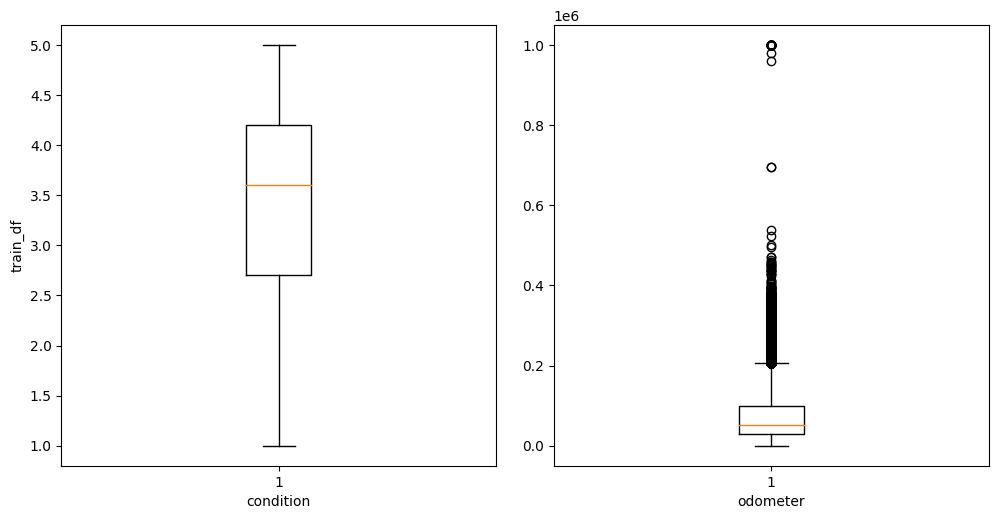

In [28]:
columns_numeric = ['condition', 'odometer']
out_boxplot(train_df, columns_numeric)

Видно, что есть выбросы в виде точек за пределами "ящика с усами" в столбце `odometer`. Удалим строки с этими значениями на основе "правила 3 сигм".

Функция для удаления строк с выбросами

In [29]:
def df_process(df, columns):
    df_processed = df
    for column in columns:
        q25 = df_processed[column].quantile(.25)
        q75 = df_processed[column].quantile(.75)        
        q_min = q25 - 1.5*(q75-q25)
        q_max = q75 + 1.5*(q75-q25)
        df_processed = df_processed[df_processed[column] >= q_min]
        df_processed = df_processed[df_processed[column] <= q_max]
    return df_processed

Вызов функции для удаления строк с выбросами

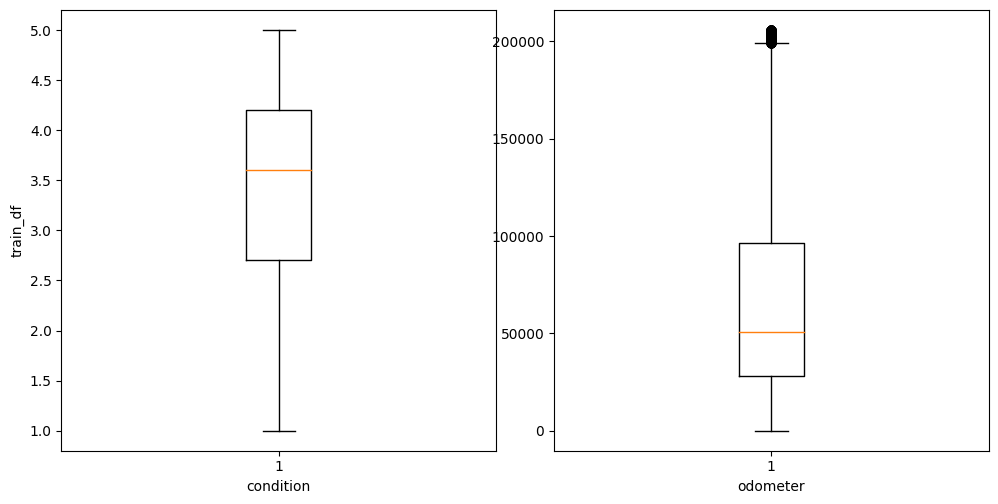

In [30]:
need_num_columns = ['odometer']
train_df = df_process(train_df, need_num_columns).reset_index(drop=True)
out_boxplot(train_df, columns_numeric)


In [31]:
train_df_current_rows = train_df.shape[0]
print(f'Было строк - {train_df_start_rows}. Стало - {train_df_current_rows}')

Было строк - 440236. Стало - 432010


Также можем определить, как столбцы зависят друг от друга, где положительные значения показывают прямую зависимость, отрицательные - обратную

In [32]:
train_df.corr()

,condition,odometer,sellingprice
condition,1.000000,-0.549384,0.534497
odometer,-0.549384,1.000000,-0.595098
sellingprice,0.534497,-0.595098,1.000000


### Тестовые данные

Проделаем те же самые шаги с тестовыми данными, помня то, что мы их условно не знаем, то есть **нельзя удалять строки**

#### Преобразование столбцов

Преобразование столбца `year`

In [33]:
test_df['year'] = test_df['year'].astype('str')

Преобразование столбца `saledate`

In [34]:
test_df['weekday'] = test_df.apply(weekday, axis=1)
test_df['timezone'] = test_df.apply(timezone, axis=1)
test_df['saledate'] = test_df.apply(saledate, axis=1)

In [35]:
test_df['saledate'] = pd.to_datetime(test_df['saledate'], format=' %m %d %Y %H:%M:%S')

#### Обработка дубликатов

Удаление неявных дубликатов на основе тренировочных данных

In [36]:
for column in test_df.columns:
    if (test_df[column].dtype == np.object) & (column != 'vin'):
        test_df[column] = test_df[column].fillna('-')
        test_df[column] = test_df.apply(lambda x: edit_row(x[column]), axis=1)
        print('')
        print('=======================')
        print(f'column: {column}')
        print(sorted(test_df[column].unique()))


column: year
['1982', '1984', '1986', '1987', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']

column: make
['-', 'acura', 'aston martin', 'audi', 'bentley', 'bmw', 'buick', 'cadillac', 'chev truck', 'chevrolet', 'chrysler', 'daewoo', 'dodge', 'ferrari', 'fiat', 'fisker', 'ford', 'ford tk', 'geo', 'gmc', 'honda', 'hummer', 'hyundai', 'hyundai tk', 'infiniti', 'isuzu', 'jaguar', 'jeep', 'kia', 'land rover', 'landrover', 'lexus', 'lincoln', 'lotus', 'maserati', 'mazda', 'mercedes', 'mercedes-benz', 'mercury', 'mini', 'mitsubishi', 'nissan', 'oldsmobile', 'plymouth', 'pontiac', 'porsche', 'ram', 'rolls-royce', 'saab', 'saturn', 'scion', 'smart', 'subaru', 'suzuki', 'tesla', 'toyota', 'volkswagen', 'volvo', 'vw']

column: model
['-', '1', '1 series', '1500', '2 series', '200', '200sx', '2500', '3', '3 series', '3 series gra


column: trim
['& coun fwd limited', '& country lx', '(1999.5) xe', '-', '1', '1.6', '1.6 base', '1.6 s', '1.6 s plus', '1.6 sl', '1.6 sv', '1.8', '1.8 base', '1.8 krom', '1.8 s', '1.8 sl', '1.8 tfsi premium', '1.8 tfsi premium plus', '1.8t', '1.8t avant quattro', '1.8t classic', '1.8t quattro', '1.9', '128i', '128i sulev', '135i', '150 low roof', '1500', '1500 high roof', '1500 low roof', '1500 ls', '1500 lt', '1500 lt1', '1500 ltz', '1500 maxi', '1500 s', '1500 sle', '1500 slt', '1500 sv', '1794 ffv', '180hp', '180hp quattro', '1ls fleet', '1lt', '1lt fleet', '1ss', '2', '2-2', '2.0', '2.0 s', '2.0 sl', '2.0 sr', '2.0 tdi premium', '2.0 tfsi premium plus quattro', '2.0 tfsi premium quattro', '2.0 tfsi prestige quattro', '2.0i', '2.0i limited pzev', '2.0i premium pzev', '2.0i pzev', '2.0i sport limited pzev', '2.0i sport premium pzev', '2.0l tdi', '2.0t', '2.0t avant premium quattro', '2.0t avant quattro', '2.0t premium', '2.0t premium plus', '2.0t premium plus quattro', '2.0t premium


column: body
['-', 'acces cab', 'beetle convertible', 'cab plus', 'club cab', 'convertible', 'coupe', 'crew cab', 'crewmax cab', 'cts coupe', 'cts wagon', 'cts-v coupe', 'double cab', 'e-series van', 'elantra coupe', 'extended cab', 'g convertible', 'g coupe', 'g sedan', 'g37 convertible', 'g37 coupe', 'genesis coupe', 'granturismo convertible', 'hatchback', 'king cab', 'koup', 'mega cab', 'minivan', 'promaster cargo van', 'q60 convertible', 'q60 coupe', 'quad cab', 'regular cab', 'regular-cab', 'sedan', 'supercab', 'supercrew', 'suv', 'transit van', 'tsx sport wagon', 'van', 'wagon', 'xtracab']

column: transmission
['-', 'automatic', 'manual']

column: state
['ab', 'al', 'az', 'ca', 'co', 'fl', 'ga', 'hi', 'il', 'in', 'la', 'ma', 'md', 'mi', 'mn', 'mo', 'ms', 'nc', 'ne', 'nj', 'nm', 'ns', 'nv', 'ny', 'oh', 'ok', 'on', 'or', 'pa', 'pr', 'qc', 'sc', 'tn', 'tx', 'ut', 'va', 'wa', 'wi']

column: color
['-', 'beige', 'black', 'blue', 'brown', 'burgundy', 'charcoal', 'gold', 'gray', 'gree


column: weekday
['fri', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed']

column: timezone
['gmt-0700 (pdt)', 'gmt-0800 (pst)']


In [38]:
test_df['make'] = test_df.apply(lambda x: make(x['make']), axis=1)
test_df['model'] = test_df.apply(lambda x: model(x['model']), axis=1)
test_df['trim'] = test_df.apply(lambda x: trim(x['trim']), axis=1)
test_df['body'] = test_df.apply(lambda x: body(x['body']), axis=1)
test_df['seller'] = test_df.apply(lambda x: seller(x['seller']), axis=1)

#### Обработка пропущенных значений

In [39]:
test_df.isna().sum()

year               0
make               0
model              0
trim               0
body               0
transmission       0
vin                0
state              0
condition       2379
odometer          19
color              0
interior           0
seller             0
saledate           0
weekday            0
timezone           0
dtype: int64

Заполнение столбцов `condition` и `odometer`

In [40]:
for t in test_df['year'].unique():
    test_df.loc[(test_df['year'] == t) & (test_df['condition'].isna()), 'condition'] = \
    test_df.loc[(test_df['year'] == t), 'condition'].median()

In [41]:
test_df['odometer'] = test_df['odometer'].fillna(test_df['odometer'].median())

#### Исследовательский анализ данных

Исследуем данные на выбросы

In [42]:
test_df.describe()

,condition,odometer
count,110058.00000,110058.000000
mean,3.40903,68071.543123
std,0.94976,53516.788840
min,1.00000,1.000000
25%,2.70000,28317.000000
50%,3.60000,51922.000000
75%,4.20000,98846.500000
max,5.00000,999999.000000


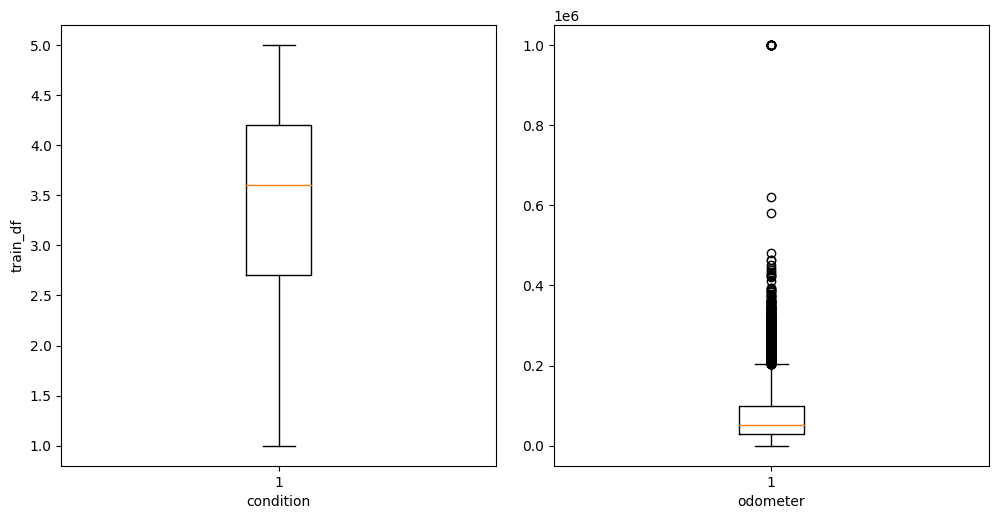

In [43]:
columns_numeric = ['condition', 'odometer']
out_boxplot(test_df, columns_numeric)

Замена выбросов медианными значениями по столбцу `year`

In [44]:
def df_process_test(df, columns):
    df_processed = df
    for column in columns:
        q25 = df_processed[column].quantile(.25)
        q75 = df_processed[column].quantile(.75)        
        q_min = q25 - 1.5*(q75-q25)
        q_max = q75 + 1.5*(q75-q25)
        
        for t in test_df['year'].unique():
            test_df.loc[(test_df['year'] == t) & (
                (df_processed[column] < q_min)| (df_processed[column] > q_max)
            ), column] = \
            test_df.loc[(test_df['year'] == t), column].median()
    return df_processed

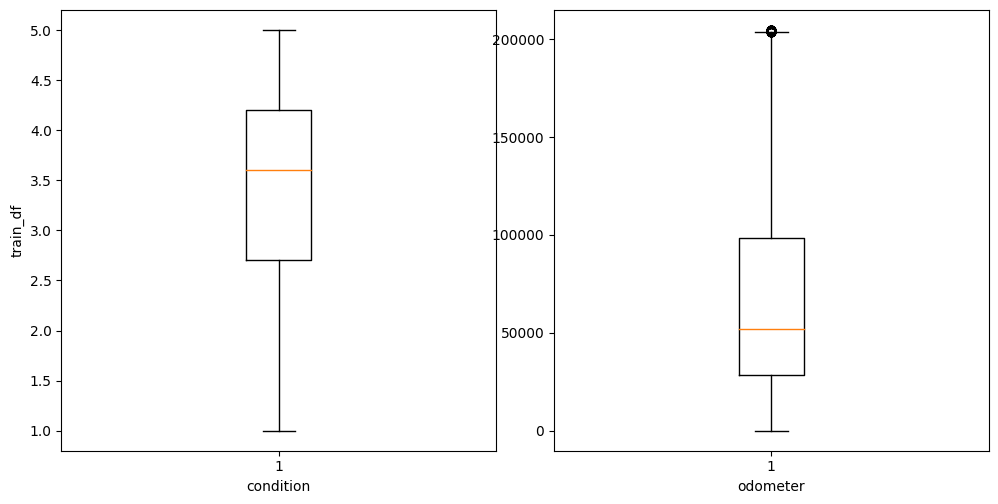

In [45]:
need_num_columns = ['odometer']
test_df = df_process_test(test_df, need_num_columns).reset_index(drop=True)
out_boxplot(test_df, columns_numeric)

### Подготовка данных для обучения моделей

Зададим для обучающих данных целевой признак (это цена, по которой автомобиль был продан на аукционе), т.е. столбец `sellingprice` - target_train, и признаки без целевого - features_train. Это проводилось с целью дальнейшего кодирования признаков, т.к. тестовые данные в виде набора признаков уже без целевого.

In [46]:
target_train = train_df['sellingprice']
features_train = train_df.drop(['sellingprice'], axis=1)

#### Кодирование признаков

In [47]:
encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
print('до кодирования тренировочных данных')
display(features_train.head())
features_train_ordinal = pd.DataFrame(encoder.fit_transform(features_train), 
                                       columns=features_train.columns)
print('после')
display(features_train_ordinal.head())


до кодирования тренировочных данных


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,saledate,weekday,timezone
0,2011,ford,edge,sel,suv,automatic,2fmdk3jc4bba41556,md,4.2,111041.0,black,black,santander company nsumer,2015-06-02 02:30:00,tue,gmt-0700 (pdt)
1,2014,ford,fusion,se,sedan,automatic,3fa6p0h75er208976,mo,3.5,31034.0,black,black,ars/avis budget group,2015-02-25 02:00:00,wed,gmt-0800 (pst)
2,2012,nissan,sentra,2 sl,sedan,automatic,3n1ab6ap4cl698412,nj,2.2,35619.0,black,black,nissan-infiniti lt,2015-06-10 02:30:00,wed,gmt-0700 (pdt)
3,2003,hummer,h2,base,suv,automatic,5grgn23u93h101360,tx,2.8,131301.0,gold,beige,"wichita falls ford lin, inc",2015-06-17 03:00:00,wed,gmt-0700 (pdt)
4,2007,ford,fusion,sel,sedan,automatic,3fahp08z17r268380,md,2.0,127709.0,black,black,purple heart,2015-02-03 04:00:00,tue,gmt-0800 (pst)


после


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,saledate,weekday,timezone
0,29.0,17.0,228.0,1353.0,39.0,1.0,190250.0,12.0,32.0,101563.0,2.0,2.0,10492.0,2895.0,5.0,0.0
1,32.0,17.0,304.0,1322.0,36.0,1.0,230513.0,15.0,25.0,28854.0,2.0,2.0,707.0,1693.0,6.0,1.0
2,30.0,40.0,642.0,63.0,36.0,1.0,252497.0,19.0,12.0,33428.0,2.0,2.0,8334.0,3108.0,6.0,0.0
3,21.0,21.0,366.0,552.0,39.0,1.0,288461.0,33.0,18.0,117294.0,7.0,1.0,12592.0,3253.0,6.0,0.0
4,25.0,17.0,304.0,1353.0,36.0,1.0,237507.0,12.0,10.0,114658.0,2.0,2.0,9562.0,1094.0,5.0,1.0


In [48]:
print('до кодирования тестовых данных')
display(test_df.head())
test_df_ordinal = pd.DataFrame(encoder.transform(test_df), columns=test_df.columns)
print('после')
display(test_df_ordinal.head())

до кодирования тестовых данных


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,saledate,weekday,timezone
0,2005,cadillac,cts,base,sedan,automatic,1g6dp567450124779,ca,2.7,116970.0,silver,black,lexus of stevens creek,2015-01-14 04:30:00,wed,gmt-0800 (pst)
1,2014,gmc,savana cargo,2500,van,-,1gtw7fca7e1902207,pa,4.4,6286.0,white,gray,u-haul,2015-02-27 01:00:00,fri,gmt-0800 (pst)
2,2013,nissan,murano,s,suv,automatic,jn8az1mw6dw303497,oh,4.6,11831.0,gray,black,nissan-infiniti lt,2015-02-24 01:30:00,tue,gmt-0800 (pst)
3,2013,chevrolet,impala,ls fleet,sedan,automatic,2g1wf5e34d1160703,fl,2.3,57105.0,silver,black,"onemain rem/auto club of miami, inc dba north dad",2015-03-06 02:00:00,fri,gmt-0800 (pst)
4,2013,nissan,titan,sv,crew cab,automatic,1n6aa0ec3dn301209,tn,2.9,31083.0,black,black,"nissan north america, inc",2015-06-03 03:30:00,wed,gmt-0700 (pdt)


после


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,saledate,weekday,timezone
0,23.0,8.0,194.0,552.0,36.0,1.0,-1.0,3.0,17.0,106361.0,16.0,2.0,6920.0,643.0,6.0,1.0
1,32.0,19.0,636.0,142.0,42.0,0.0,-1.0,28.0,34.0,4522.0,18.0,7.0,12026.0,1799.0,0.0,1.0
2,31.0,40.0,495.0,1269.0,39.0,1.0,-1.0,24.0,36.0,9770.0,8.0,2.0,8334.0,1657.0,5.0,1.0
3,31.0,9.0,380.0,1076.0,36.0,1.0,-1.0,5.0,13.0,54396.0,16.0,2.0,8555.0,1949.0,0.0,1.0
4,31.0,40.0,717.0,1497.0,8.0,1.0,-1.0,32.0,19.0,28903.0,2.0,2.0,8309.0,2938.0,6.0,0.0


Чтобы в дальнейшем не путаться приравняем test_df_ordinal к features_test, т.к. ранее было сказано, что тестовые данные приведены без целевого признака.

In [49]:
features_test = test_df_ordinal

Чтобы не путаться, назовём кодированные тренировочные данные *features_train_ordinal* как *features_train*

In [50]:
features_train = features_train_ordinal

#### Масштабирование признаков

In [51]:
scaler = StandardScaler()
numeric = columns_numeric
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])


In [52]:
features_test[numeric] = scaler.transform(features_test[numeric])

## Обучение и выбор лучшей модели

Перед обучением напишем функцию расчёта метрики MAPE для выбора лучшей модели машинного обучения. Чем ниже показатель MAPE, тем лучше.

In [53]:
def mape(target, predictions): 
    target, predictions = np.array(target), np.array(predictions)
    return np.mean(np.abs((target - predictions) / target)) * 100

Далее обучим 3 модели ("дерево решений", "случайный лес", "линейная регрессия") с помощью метода перебора параметров - RandomizedSearchCV. Качество моделей проверим на метрике MAPE, которая показывает процент отклонения предсказанного значения от истинного.

### Дерево решений

In [58]:
%%time

dt = DecisionTreeRegressor(random_state=STATE)

splitter = ['best', 'random']
max_depth = [int(x) for x in np.linspace(1, 120, num = 20)]
min_samples_split = [2, 6, 10]
min_samples_leaf = [1, 3, 4]
max_features = ['auto', 'sqrt', 'log2']

random_grid = {
    'splitter': splitter,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'max_features': max_features
}

dt_random = RandomizedSearchCV(estimator = dt,
param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=STATE, n_jobs = -1)
dt_random.fit(features_train, target_train)

# this prints the contents of the parameters in the random grid
print ('Random grid: ', random_grid, '\n')

# print the best parameters
print ('Best Parameters: ', dt_random.best_params_, ' \n')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Random grid:  {'splitter': ['best', 'random'], 'max_depth': [1, 7, 13, 19, 26, 32, 38, 44, 51, 57, 63, 69, 76, 82, 88, 94, 101, 107, 113, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'max_features': ['auto', 'sqrt', 'log2']} 

Best Parameters:  {'splitter': 'best', 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 76}

CPU times: total: 16.2 s
Wall time: 10min 13s


In [60]:
model_tree = DecisionTreeRegressor(splitter = 'best',
    max_depth=76, random_state=STATE, max_features='auto',
    min_samples_split = 10, min_samples_leaf = 4)
model_tree.fit(features_train, target_train)
predictions_train_tree = model_tree.predict(features_train)
mape_tree = mape(target_train, predictions_train_tree)
print(mape_tree)

10.24820291590097


### Случайный лес

In [61]:
%%time
rf = RandomForestRegressor(random_state=STATE)

n_estimators = [int(x) for x in np.linspace(start = 1, stop = 151, num = 15)]
max_depth = [int(x) for x in np.linspace(1, 120, num = 20)]
min_samples_split = [2, 6, 10]
min_samples_leaf = [1, 3, 4]
max_features = [None, 'sqrt', 'log2']
bootstrap = [True, False]

random_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'max_features': max_features,
    'bootstrap': bootstrap
}

rf_random = RandomizedSearchCV(estimator = rf,
param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=STATE, n_jobs = -1)
rf_random.fit(features_train, target_train)

# this prints the contents of the parameters in the random grid
print ('Random grid: ', random_grid, '\n')

# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Random grid:  {'n_estimators': [1, 11, 22, 33, 43, 54, 65, 76, 86, 97, 108, 118, 129, 140, 151], 'max_depth': [1, 7, 13, 19, 26, 32, 38, 44, 51, 57, 63, 69, 76, 82, 88, 94, 101, 107, 113, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'max_features': [None, 'sqrt', 'log2'], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 129, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 107, 'bootstrap': True}

CPU times: total: 19min 48s
Wall time: 17h 34min 2s


In [62]:
%%time

model_rf = RandomForestRegressor(n_estimators = 129,
    max_depth=107, random_state=STATE, max_features=None,
    min_samples_split = 2, min_samples_leaf = 1, bootstrap = True)
model_rf.fit(features_train, target_train)
predictions_train_rf = model_rf.predict(features_train)
mape_rf = mape(target_train, predictions_train_rf)
print(mape_rf)

6.321188168834256
CPU times: total: 22min 22s
Wall time: 23min 40s


### Линейная регрессия

In [63]:
%%time

lr = SGDRegressor(random_state=STATE)

loss = ['squared_error', 'huber', 'epsilon_insensitive', 
        'squared_epsilon_insensitive']
penalty = ['l2', 'l1', 'elasticnet', None]
alpha = [ .00001, .0003, .0001, .0003, .001, .003, .01, .03, 1, 3]
l1_ratio = [ .1, .2, .3, .4, .5, .6, .7, .8, .9]
eta0 = [ .001, .003, .01, .03, .1, .3, 1, 3]
epsilon = [ .01, .03, .1, .3, 1, 3]
learning_rate = ['constant', 'optimal', 'invscaling', 'adaptive']

random_grid_lr = {
    'loss': loss,
    'penalty': penalty,
    'alpha': alpha,
    'l1_ratio': l1_ratio,
    'eta0': eta0,
    'epsilon': epsilon,
    'learning_rate': learning_rate
}

lr_random = RandomizedSearchCV(estimator = lr, 
    param_distributions = random_grid_lr, n_iter = 100, 
    cv = 5, verbose=2, random_state=STATE, n_jobs = -1)
lr_random.fit(features_train, target_train)


print('Random grid: ', random_grid_lr, '\n')
print('Best Parameters: ', lr_random.best_params_, ' \n')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Random grid:  {'loss': ['squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'], 'penalty': ['l2', 'l1', 'elasticnet', None], 'alpha': [1e-05, 0.0003, 0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 1, 3], 'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 'eta0': [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3], 'epsilon': [0.01, 0.03, 0.1, 0.3, 1, 3], 'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive']}

Best Parameters:  {'penalty': 'elasticnet', 'loss': 'huber', 'learning_rate': 'adaptive', 'l1_ratio': 0.7, 'eta0': 0.03, 'epsilon': 1, 'alpha': 0.003}

CPU times: total: 42.4 s
Wall time: 2h 20min 28s


In [64]:
%%time
model_lr = SGDRegressor(random_state=STATE, penalty = 'elasticnet',
    loss = 'huber', learning_rate = 'adaptive', l1_ratio = 0.7,
    eta0 = 0.03, epsilon = 1, alpha = 0.003
    )
model_lr.fit(features_train, target_train)
predictions_train_lr = model_lr.predict(features_train)
mape_lr = mape(target_train, predictions_train_lr)
print(mape_lr)

70.63681736411962
CPU times: total: 36.7 s
Wall time: 37.8 s


Обобщим результаты 3 моделей в одну таблицу для наглядного их сравнения по метрике MAPE

In [72]:
mape_data_train = {'MAPE':[mape_tree, mape_rf, mape_lr],
                  'runtime':['10min 13s', '17h 34min 2s', '2h 20min 28s'],} 
 

mape_df = pd.DataFrame(mape_data_train, index=['Decision Tree',
                                    'Random Forest',
                                    'Linear Regression (SGD Regressor)'])
mape_df

,MAPE,runtime
Decision Tree,10.248203,10min 13s
Random Forest,6.321188,17h 34min 2s
Linear Regression (SGD Regressor),70.636817,2h 20min 28s


Данная таблица показала, что лучше всего работает модель `Decision Tree` на тренировочных данных, т.к. она не слишком сильно переобучилась и в то же время показала очень хороший результат по скорости.

## Оценка моделей на тестовых данных

Затем предскажем на основе тестовых данных и подготовим файл в формате столбцов `vin` и `sellingprice` для их загрузки на соревнование kaggle, где произойдёт расчёт метрики MAPE, причём расчёт будет разделен на 2 части с публичными и приватными данными.

In [66]:
predictions_test_tree = model_tree.predict(features_test)
predictions_test_rf = model_rf.predict(features_test)
predictions_test_lr = model_lr.predict(features_test)

In [67]:
predictions_test_tab_tree = pd.DataFrame(
    predictions_test_tree, index=test_df['vin'], columns=['sellingprice'])

predictions_test_tab_rf = pd.DataFrame(
    predictions_test_rf, index=test_df['vin'], columns=['sellingprice'])

predictions_test_tab_lr = pd.DataFrame(
    predictions_test_lr, index=test_df['vin'], columns=['sellingprice'])

In [68]:
predictions_test_tab_tree.to_csv('predictions_test_tab_tree.csv')
predictions_test_tab_rf.to_csv('predictions_test_tab_rf.csv')
predictions_test_tab_lr.to_csv('predictions_test_tab_lr.csv')

Получаем такой результат

In [71]:
mape_data_test = {'private':[47.46694, 48.80518, 77.86219],
            'public':[47.66953, 47.65522, 77.01969]}


mape_df = pd.DataFrame(mape_data_test, index=['Decision Tree',
                                    'Random Forest',
                                    'Linear Regression (SGD Regressor)'])
print('MAPE')
display(mape_df)

MAPE


,private,public
Decision Tree,47.46694,47.66953
Random Forest,48.80518,47.65522
Linear Regression (SGD Regressor),77.86219,77.01969


Таблица показывает, что модели *Decision Tree* и *Random Forest* в лидерах. Поэтому обе модели предлагаются для предсказания цен автомобиля.

## Вывод

В данной работе была разработана модель предсказания стоимости автомобиля на вторичном рынке. 
1. Сначала предстояло прочесть данные (обучающие и тестовые), посмотреть, что они из себя представляют. 


2. После этого происходила предобработка данных. Касательно тренировочных данных:
    
    1. на этом этапе преобразовали столбец `year` из типа числа в строковый тип. 
    2. Также разбили столбец `saledate` на 3 столбца - `saledate`, `weekday`, `timezone`. 
    3. Затем исследовали столбцы с типом строка на дубликаты. Неявные дубликаты были обнаружены в столбцах `make`, `model`, `trim`, `body`, `seller`, которые были устранены с помощью одноименных функций. 
    4. Исследовали данные на пропуски, они были в столбцах `condition`, `odometer`. В данной ситуации оказалось ≈5% пропусков в I столбце и ≈0.03% во II. На основании этого было принято решение заполнить столбец `condition` медианными значениями по столбцу `year` и удалить строки с пустыми значениями в столбце `odometer`.
    5. Заключительным этапом в предобработки данных послужило исследование данных на выбросы, где удалялись строки по "правилу 3 сигм".

   Касательно тестовых данных:
    шаги повторялись, за исключением шагов 4 и 5, где вместо удаления строк было заполнение ячеек медианными значениями.
    
    
3. Подготовка признаков для обучения моделей. Данный этап из двух шагов:
    1. Кодирования категориальных признаков (Ordinal Encoder)
    2. Масштабирования признаков


4. Далее выбранные модели ("дерево решений" - DT, "случайный лес" - RF и "линейная регрессия" - LR) были обучены с помощью случайной кросс-валидации (RandomizedSearchCV). Модели показали следующие значения на основе метрики MAPE, процент отклонений от истинных значений, а также скорость обучения моделей - :
    - DT - 10.2 % - 10 min
    - RF - 6.3 % - 17 h
    - LR - 70.6 % - 2 h
  
  Таким образом, лучшей моделей на обучении была признана модель *Decision Tree*

    
5. После обучения данных предсказали результат уже на тестовых данных. Загрузили их на соревнование kaggle и увидели следующие результаты на публичных и приватных данных.
    - mod - private - public
    - DT - 47.46694 - 47.66953
    - RF - 48.80518 - 47.65522
    - LR - 77.86219 - 77.01969
    
  На заключительном этапе "дерево решений" и "случайный лес" показали результат на уровне порога 50%.
  
Подведя итоги, на основании метрики MAPE и скорости обучения модели машинного обучения для предсказания стоимости поддержанного автомобиля рекомендуется модель "Дерево решений".

## Чек-лист готовности проекта: 

- [x] загрузка и ознакомление с данными,
- [x] предварительная обработка,
- [x] полноценный разведочный анализ,
- [x] разработка новых синтетических признаков *(разбиение столбца с датой на 3 столбца)*,
- [x] проверка на мультиколлинеарность,
- [x] отбор финального набора обучающих признаков,
- [x] выбор и обучение моделей,
- [x] итоговая оценка качества предсказания лучшей модели.